# USA States GeoJson

## Installations

In [1]:
# !pip3 install --upgrade pip

In [2]:
# %pip install geopandas
# %pip install tabulate
# pip install contextily

## Imports

In [3]:
import sys

from tabulate import tabulate
import numpy as np
import pandas as pd

import geopandas

from shapely.geometry import box, Point

import folium

import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
%matplotlib inline

import contextily as cx

## Display Imports & Their Versions

In [4]:
headers = ["Software/Library", "Version"]

table_data = [
    ['Python', sys.version[0:6]],
    ['NumPy', np.__version__],
    ['Pandas', pd.__version__],
    ['geopandas', geopandas.__version__],
    ['Folium', folium.__version__],
    ['Contextily', cx.__version__]
    ]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------------------+-----------+
| Software/Library   | Version   |
+====================+===========+
| Python             | 3.11.4    |
+--------------------+-----------+
| NumPy              | 1.26.4    |
+--------------------+-----------+
| Pandas             | 1.5.3     |
+--------------------+-----------+
| geopandas          | 1.0.1     |
+--------------------+-----------+
| Folium             | 0.19.4    |
+--------------------+-----------+
| Contextily         | 1.6.2     |
+--------------------+-----------+


### Import First Dataset

In [5]:
gdf_us_states = geopandas.read_file("data/us-states.json")

gdf_us_states

,id,name,geometry
0,AL,Alabama,"POLYGON ((-87.3593 35.00118, -85.60668 34.9847..."
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,AZ,Arizona,"POLYGON ((-109.0425 37.00026, -109.04798 31.33..."
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."
5,CO,Colorado,"POLYGON ((-107.91973 41.00391, -105.72895 40.9..."
6,CT,Connecticut,"POLYGON ((-73.05353 42.03905, -71.79931 42.022..."
7,DE,Delaware,"POLYGON ((-75.41409 39.80446, -75.5072 39.6839..."
8,FL,Florida,"POLYGON ((-85.49714 30.99754, -85.00421 31.003..."
9,GA,Georgia,"POLYGON ((-83.10919 35.00118, -83.32279 34.787..."


In [6]:
gdf_us_states.describe(include='all')

,id,name,geometry
count,50,50,50
unique,50,50,50
top,AL,Alabama,"POLYGON ((-87.359296 35.00118, -85.606675 34.9..."
freq,1,1,1


### Import Second Dataset

In [7]:
gdf_us_popu = geopandas.read_file("data/usa_population_2019.csv")

gdf_us_popu

,Geographic Area,Postal Code,Total Resident Population
0,United States,,328239523
1,Northeast,,55982803
2,Midwest,,68329004
3,South,,125580448
4,West,,78347268
5,Alabama,AL,4903185
6,Alaska,AK,731545
7,Arizona,AZ,7278717
8,Arkansas,AR,3017804
9,California,CA,39512223


### Join Datasets into One & Remove Duplicate Columns

In [8]:
gdf = pd.merge(gdf_us_states, gdf_us_popu, left_on='name', right_on='Geographic Area')

gdf = gdf.drop(columns=["Geographic Area", "id"])

gdf

,name,geometry,Postal Code,Total Resident Population
0,Alabama,"POLYGON ((-87.3593 35.00118, -85.60668 34.9847...",AL,4903185
1,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691...",AK,731545
2,Arizona,"POLYGON ((-109.0425 37.00026, -109.04798 31.33...",AZ,7278717
3,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",AR,3017804
4,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",CA,39512223
5,Colorado,"POLYGON ((-107.91973 41.00391, -105.72895 40.9...",CO,5758736
6,Connecticut,"POLYGON ((-73.05353 42.03905, -71.79931 42.022...",CT,3565287
7,Delaware,"POLYGON ((-75.41409 39.80446, -75.5072 39.6839...",DE,973764
8,Florida,"POLYGON ((-85.49714 30.99754, -85.00421 31.003...",FL,21477737
9,Georgia,"POLYGON ((-83.10919 35.00118, -83.32279 34.787...",GA,10617423


### Return Information About Unqiue Values in Select Features

In [9]:
cols_to_check = [
    "name",
    "Postal Code",
    "Total Resident Population"
]

for col in cols_to_check:
    u_vals = np.sort(gdf[col].unique())
    if len(u_vals) < 25:
        print(f"{col} ({len(u_vals)})\n{u_vals}\n")
    else:
        print(f"{col} ({len(u_vals)})\n")

name (50)

Postal Code (50)

Total Resident Population (50)



### Convert Population Feature From String to Integer

In [10]:
gdf['Total Resident Population'] = gdf['Total Resident Population'].astype(int)

gdf

,name,geometry,Postal Code,Total Resident Population
0,Alabama,"POLYGON ((-87.3593 35.00118, -85.60668 34.9847...",AL,4903185
1,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691...",AK,731545
2,Arizona,"POLYGON ((-109.0425 37.00026, -109.04798 31.33...",AZ,7278717
3,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",AR,3017804
4,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",CA,39512223
5,Colorado,"POLYGON ((-107.91973 41.00391, -105.72895 40.9...",CO,5758736
6,Connecticut,"POLYGON ((-73.05353 42.03905, -71.79931 42.022...",CT,3565287
7,Delaware,"POLYGON ((-75.41409 39.80446, -75.5072 39.6839...",DE,973764
8,Florida,"POLYGON ((-85.49714 30.99754, -85.00421 31.003...",FL,21477737
9,Georgia,"POLYGON ((-83.10919 35.00118, -83.32279 34.787...",GA,10617423


### Rename Features as Needed

In [11]:
cols_to_rename = {
    "name": "state_name",
    "Postal Code": "state_abbr",
    "Total Resident Population": "population"
}

gdf.rename(columns=cols_to_rename, inplace=True)

gdf.head()

,state_name,geometry,state_abbr,population
0,Alabama,"POLYGON ((-87.3593 35.00118, -85.60668 34.9847...",AL,4903185
1,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691...",AK,731545
2,Arizona,"POLYGON ((-109.0425 37.00026, -109.04798 31.33...",AZ,7278717
3,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",AR,3017804
4,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",CA,39512223


## Data Visualizations

### Non-Interactive Data Visualization

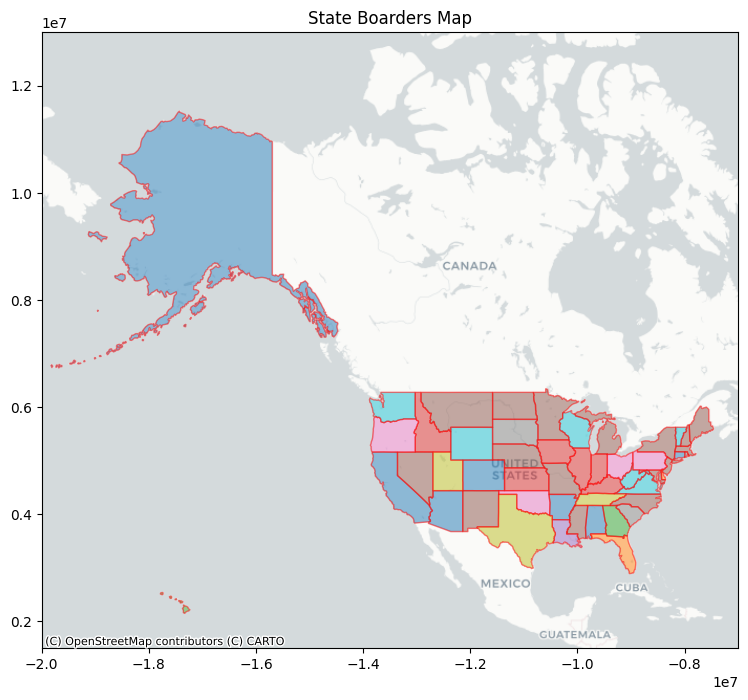

In [12]:
gdf_plot = gdf.to_crs(epsg=3857)

gdf_plot['category'] = gdf_plot['state_name'].str[0]

fig, ax = plt.subplots(figsize=(24, 8))
gdf_plot.plot(column='category', ax=ax, alpha=0.5, edgecolor="red")

ax.set_xlim(-20000000, -7000000)
ax.set_ylim(1500000, 13000000)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

ax.set_title("State Boarders Map")

plt.show()

### Interactive Data Visualization

In [13]:
def format_number(value):
    if isinstance(value, (int, float)):
        return f"{value:,}"
    return value

gdf_formatted = gdf.copy()
gdf_formatted['population'] = gdf_formatted['population'].apply(format_number)

gdf_formatted.explore(
    m = folium.Map(
        location=[52.5, -111.275], 
        tiles='OpenStreetMap', # CartoDB Voyager, OpenStreetMap
        zoom_start=3,
        prefer_canvas=True
        ),
    popup=True,
    highlight=True,
    legend=True,
    control_scale=True,
    style_kwds = {
        'stroke': True,
        'color': '#3271a5',
        'weight': 1,
        'opacity': 0.75,
        'fill': True,
        'fillColor': '#b8e2f4',
        'fillOpacity': 0.35
    },
    highlight_kwds ={
        'stroke': True,
        'color': 'green',
        'weight': 2,
        'opacity': 1,
        'fill': True,
        'fillColor': '#88e788',
        'fillOpacity': 0.35
    },
    tooltip_kwds = {
        'labels': True,
        'aliases': ['State Name', 'State Code', 'Population']  
    }
)

## Methods & Attributes

### General Methods & attributes

In [14]:
print("Geometry Type")

gdf_gt = gdf[["state_name", "state_abbr", "population"]].copy()
gdf_gt['geometry_type'] = gdf.geom_type

gdf_gt

Geometry Type


,state_name,state_abbr,population,geometry_type
0,Alabama,AL,4903185,Polygon
1,Alaska,AK,731545,MultiPolygon
2,Arizona,AZ,7278717,Polygon
3,Arkansas,AR,3017804,Polygon
4,California,CA,39512223,Polygon
5,Colorado,CO,5758736,Polygon
6,Connecticut,CT,3565287,Polygon
7,Delaware,DE,973764,Polygon
8,Florida,FL,21477737,Polygon
9,Georgia,GA,10617423,Polygon


### Add Distance Features to Dataset

In [15]:
# Use the Harvard address coordinates as the reference point for distances

latitude = 42.3745
longitude = -71.1185

# Create a Shapely Point object
ref_point = Point(longitude, latitude)

if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Estimate an appropriate UTM CRS for your GeoDataFrame
utm_crs = gdf.estimate_utm_crs()

# Reproject your GeoDataFrame to the estimated UTM CRS
gdf_projected = gdf.to_crs(utm_crs)

# Reproject the reference point to the same UTM CRS
ref_point_projected = geopandas.GeoSeries([ref_point], crs='EPSG:4326').to_crs(utm_crs).iloc[0]

In [16]:
# Calculate distances
gdf_projected['dist_from_harvard'] = gdf_projected['geometry'].distance(ref_point_projected)
gdf_projected['frechet_dist_from_harvard'] = gdf_projected['geometry'].frechet_distance(ref_point_projected)
gdf_projected['hausdorff_dist_from_harvard'] = gdf_projected['geometry'].hausdorff_distance(ref_point_projected)

gdf_projected

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/shapely/measurement.py:218: RuntimeWarning: invalid value encountered in hausdorff_distance
  return lib.hausdorff_distance(a, b, **kwargs)


,state_name,geometry,state_abbr,population,dist_from_harvard,frechet_dist_from_harvard,hausdorff_dist_from_harvard
0,Alabama,"POLYGON ((-6779600.906 9111727.512, -6729569.3...",AL,4903185,2.288287e+06,3.296022e+06,3.296022e+06
1,Alaska,"MULTIPOLYGON (((-2572616.273 12619076.774, -25...",AK,731545,5.441704e+06,8.691238e+06,8.691238e+06
2,Arizona,"POLYGON ((-5969534.848 12235679.15, -6891588.9...",AZ,7278717,4.840007e+06,5.990385e+06,5.990385e+06
3,Arkansas,"POLYGON ((-6566360.026 10218868.063, -6554453....",AR,3017804,2.658128e+06,3.565277e+06,3.565277e+06
4,California,"POLYGON ((-4362118.196 13250053.559, -4421593....",CA,39512223,5.459058e+06,6.272750e+06,6.272750e+06
5,Colorado,"POLYGON ((-5415372.333 11832616.168, -5510736....",CO,5758736,3.696922e+06,4.840007e+06,4.840007e+06
6,Connecticut,"POLYGON ((-5012263.766 7691825.564, -4944085.3...",CT,3565287,9.438150e+04,3.651974e+05,3.651974e+05
7,Delaware,"POLYGON ((-5457822.091 7781674.889, -5480613.0...",DE,973764,6.520591e+05,8.354453e+05,8.354453e+05
8,Florida,"POLYGON ((-7496831.461 8640608.901, -7473342.2...",FL,21477737,2.506724e+06,3.573202e+06,3.573202e+06
9,Georgia,"POLYGON ((-6628270.127 8468638.615, -6676137.8...",GA,10617423,2.005716e+06,2.844932e+06,2.844932e+06


### Retrieve Coordinates

In [17]:
gdf_get_coords = gdf.get_coordinates(include_z=True)
gdf_count_coords = gdf.count_coordinates()
gdf_count_geos = gdf.count_geometries()

print(f"GDF Coordinates:\n{gdf_get_coords}\n")
print(f"GDF Count Coordinates:\n{gdf_count_coords}\n")
print(f"GDF Count Geometries:\n{gdf_count_geos}")

GDF Coordinates:
             x          y   z
0   -87.359296  35.001180 NaN
0   -85.606675  34.984749 NaN
0   -85.431413  34.124869 NaN
0   -85.184951  32.859696 NaN
0   -85.069935  32.580372 NaN
..         ...        ...  ..
49 -111.047063  40.998429 NaN
49 -111.047063  42.000709 NaN
49 -111.047063  44.476286 NaN
49 -111.052540  45.002073 NaN
49 -109.080842  45.002073 NaN

[3517 rows x 3 columns]

GDF Count Coordinates:
0       33
1     1074
2       32
3       37
4       93
5       16
6       16
7       13
8       78
9       51
10      49
11      66
12      67
13      46
14      50
15      13
16      75
17      76
18      66
19      64
20      35
21     152
22      83
23      46
24      53
25      52
26      29
27      21
28      28
29      32
30      17
31      68
32      61
33      16
34      47
35      45
36      56
37      33
38      15
39      44
40      29
41      43
42     152
43      12
44      28
45      80
46      72
47      65
48      75
49      13
dtype: int32

GDF Count 

### Some Basic Functions

In [18]:
gdf_is_simple = gdf.is_simple
gdf_is_valid = gdf.is_valid
gdf_is_valid_reason = gdf.is_valid_reason()
gdf_has_z = gdf.has_z

gdf_is_simple_value_counts = gdf_is_simple.value_counts()
gdf_is_valid_value_counts = gdf_is_valid.value_counts()
gdf_is_valid_reason_value_counts = gdf_is_valid_reason.value_counts()
gdf_has_z_value_counts = gdf_has_z.value_counts()

print(f"is_simple:\n{gdf_is_simple_value_counts}\n")
print(f"is_valid:\n{gdf_is_valid_value_counts}\n")
print(f"is_valid_reason:\n{gdf_is_valid_reason_value_counts}\n")
print(f"has_z:\n{gdf_has_z_value_counts}\n")

is_simple:
True     48
False     2
dtype: int64

is_valid:
True     47
False     3
dtype: int64

is_valid_reason:
Valid Geometry                                         47
Self-intersection[-76.016553 37.95325]                  2
Self-intersection[-135.611139794639 57.42533906633]     1
dtype: int64

has_z:
False    50
dtype: int64



### Check if Points Are Within Mapped Polygons

In [19]:
points_to_use = geopandas.GeoSeries([
    Point(-95.67804, 39.04833), # Topeka, Kansas, USA
    Point(-114.0719, 51.0447),  # Calgary, Alberta, Canada
    Point(80.0, -10.0),         # Midpoint in the Indian Ocean
    Point(-19.0208, 64.9631),   # Center of Iceland
    Point(31.1342, 29.9792),    # Pyramids of Giza, Egypt
    Point(86.9250, 27.9881),    # Mount Everest, Nepal
    Point(149.1300, -35.2809)   # Canberra, Australia (Capital City)
])

# Create a GeoDataFrame from points
points_to_use = geopandas.GeoDataFrame(geometry=points_to_use)

# Ensure both GeoDataFrames have the same CRS
points_to_use = points_to_use.set_crs(gdf.crs, allow_override=True)

# Perform spatial join to find points within polygons
points_within = geopandas.sjoin(points_to_use, gdf, predicate='within', how='inner')

print("points_within")
print(points_within)

points_within
                     geometry  index_right state_name state_abbr  population
0  POINT (-95.67804 39.04833)           15     Kansas         KS     2913314


### Check if Above Listed Points Are NOT Within Mapped Polygons

In [20]:
points_not_within = points_to_use[~points_to_use.index.isin(points_within.index)]

print("points_not_within")
print(points_not_within)

points_not_within
                    geometry
1  POINT (-114.0719 51.0447)
2             POINT (80 -10)
3   POINT (-19.0208 64.9631)
4    POINT (31.1342 29.9792)
5     POINT (86.925 27.9881)
6    POINT (149.13 -35.2809)


### Some More Functions

In [21]:
gdf.boundary

0     LINESTRING (-87.3593 35.00118, -85.60668 34.98...
1     MULTILINESTRING ((-131.60202 55.11798, -131.56...
2     LINESTRING (-109.0425 37.00026, -109.04798 31....
3     LINESTRING (-94.47384 36.50186, -90.15254 36.4...
4     LINESTRING (-123.23326 42.00619, -122.37885 42...
5     LINESTRING (-107.91973 41.00391, -105.72895 40...
6     LINESTRING (-73.05353 42.03905, -71.79931 42.0...
7     LINESTRING (-75.41409 39.80446, -75.5072 39.68...
8     LINESTRING (-85.49714 30.99754, -85.00421 31.0...
9     LINESTRING (-83.10919 35.00118, -83.32279 34.7...
10    MULTILINESTRING ((-155.63484 18.94827, -155.88...
11    LINESTRING (-116.04751 49.00024, -116.04751 47...
12    LINESTRING (-90.63998 42.51006, -88.78878 42.4...
13    LINESTRING (-85.99006 41.75972, -84.80704 41.7...
14    LINESTRING (-91.36842 43.50139, -91.21506 43.5...
15    LINESTRING (-101.90605 40.00163, -95.30634 40....
16    LINESTRING (-83.90335 38.76932, -83.67879 38.6...
17    LINESTRING (-93.60848 33.01853, -91.16577 

In [22]:
gdf_projected.buffer(distance=125)

0     POLYGON ((-6779477.787 9111749.151, -6729446.4...
1     MULTIPOLYGON (((761198.611 14117231.339, 76118...
2     POLYGON ((-5969423.202 12235622.934, -5969429....
3     POLYGON ((-6566234.974 10218866.402, -6554328....
4     POLYGON ((-4362023.211 13249972.292, -4421498....
5     POLYGON ((-5415256.055 11832570.253, -5510618....
6     POLYGON ((-5012152.533 7691882.636, -4943975.1...
7     POLYGON ((-5457702.024 7781709.659, -5457699.2...
8     POLYGON ((-7496710.02 8640638.714, -7473221.70...
9     POLYGON ((-6628151.66 8468678.499, -6628148.27...
10    MULTIPOLYGON (((-1974780.448 17337575.679, -19...
11    POLYGON ((-3963616.07 12091779.087, -3963622.6...
12    POLYGON ((-5515585.092 9712014.206, -5515575.9...
13    POLYGON ((-5568968.067 9132504.137, -5540456.5...
14    POLYGON ((-5359038.136 9806808.989, -5358263.6...
15    POLYGON ((-5806201.687 11159765.299, -5935934....
16    POLYGON ((-6005073.071 8760647.867, -6005072.5...
17    POLYGON ((-7244839.017 10101671.578, -7240

In [23]:
gdf_projected.centroid

0       POINT (-7208002.52 8946778.154)
1       POINT (-978357.09 12541427.423)
2     POINT (-6231431.491 12794946.177)
3       POINT (-6880185.93 9911277.896)
4      POINT (-5267341.573 13385773.64)
5      POINT (-5840826.866 11663519.57)
6      POINT (-5051428.121 7627969.975)
7      POINT (-5584046.442 7730320.127)
8      POINT (-7814681.911 7920486.773)
9      POINT (-7090247.891 8379181.276)
10    POINT (-2384922.287 17525613.406)
11    POINT (-4632203.731 12296701.762)
12      POINT (-5927903.88 9493949.056)
13     POINT (-5892403.749 9112069.724)
14    POINT (-5595319.832 10058645.326)
15    POINT (-6145714.167 10742693.708)
16     POINT (-6263134.331 8907039.597)
17     POINT (-7662944.255 9800516.348)
18     POINT (-4378692.468 7582307.084)
19     POINT (-5643857.995 7886358.854)
20       POINT (-4913599.21 7588201.61)
21     POINT (-5163525.466 9125689.411)
22     POINT (-4934741.284 10137268.58)
23      POINT (-7292145.11 9424491.045)
24      POINT (-6240804.287 9915896.81)


In [24]:
gdf.convex_hull

0     POLYGON ((-87.65505 30.2472, -88.13702 30.3184...
1     POLYGON ((-176.80321 51.61274, -177.96432 51.6...
2     POLYGON ((-111.07445 31.33163, -114.8152 32.49...
3     POLYGON ((-91.16577 33.0021, -94.04116 33.0185...
4     POLYGON ((-117.12647 32.53656, -120.47288 34.4...
5     POLYGON ((-106.86816 36.99479, -109.0425 37.00...
6     POLYGON ((-73.65599 40.98748, -73.72719 41.102...
7     POLYGON ((-75.04713 38.45165, -75.69341 38.462...
8     POLYGON ((-81.07725 25.12078, -87.51813 30.280...
9     POLYGON ((-82.16716 30.35673, -84.86729 30.712...
10    POLYGON ((-155.63484 18.94827, -155.8813 19.03...
11    POLYGON ((-114.04295 41.99523, -117.02788 42.0...
12    POLYGON ((-89.13382 36.98383, -89.29266 36.994...
13    POLYGON ((-87.12926 37.78894, -88.02748 37.799...
14    POLYGON ((-91.41771 40.37954, -95.7664 40.5876...
15    POLYGON ((-102.04297 36.99479, -102.05393 40.0...
16    POLYGON ((-89.41863 36.49638, -89.18312 37.038...
17    POLYGON ((-89.16121 29.00941, -90.79882 29

In [25]:
gdf.envelope

0     POLYGON ((-88.47112 30.2472, -84.8892 30.2472,...
1     POLYGON ((-178.12315 51.61274, 173.30473 51.61...
2     POLYGON ((-114.8152 31.33163, -109.0425 31.331...
3     POLYGON ((-94.61624 33.0021, -89.73081 33.0021...
4     POLYGON ((-124.4108 32.53656, -114.13606 32.53...
5     POLYGON ((-109.05893 36.99479, -102.04297 36.9...
6     POLYGON ((-73.72719 40.98748, -71.79931 40.987...
7     POLYGON ((-75.78652 38.45165, -75.04713 38.451...
8     POLYGON ((-87.63314 25.12078, -80.03115 25.120...
9     POLYGON ((-85.60668 30.35673, -80.88555 30.356...
10    POLYGON ((-159.76445 18.94827, -154.80782 18.9...
11    POLYGON ((-117.24148 41.99523, -111.04706 41.9...
12    POLYGON ((-91.50534 36.98383, -87.49622 36.983...
13    POLYGON ((-88.06034 37.78894, -84.80156 37.788...
14    POLYGON ((-96.63176 40.37954, -90.14158 40.379...
15    POLYGON ((-102.05393 36.99479, -94.61076 36.99...
16    POLYGON ((-89.41863 36.49638, -81.96999 36.496...
17    POLYGON ((-94.04116 29.00941, -89.00238 29

In [26]:
gdf.extract_unique_points()

0     MULTIPOINT (-87.3593 35.00118, -85.60668 34.98...
1     MULTIPOINT (-131.60202 55.11798, -131.56916 55...
2     MULTIPOINT (-109.0425 37.00026, -109.04798 31....
3     MULTIPOINT (-94.47384 36.50186, -90.15254 36.4...
4     MULTIPOINT (-123.23326 42.00619, -122.37885 42...
5     MULTIPOINT (-107.91973 41.00391, -105.72895 40...
6     MULTIPOINT (-73.05353 42.03905, -71.79931 42.0...
7     MULTIPOINT (-75.41409 39.80446, -75.5072 39.68...
8     MULTIPOINT (-85.49714 30.99754, -85.00421 31.0...
9     MULTIPOINT (-83.10919 35.00118, -83.32279 34.7...
10    MULTIPOINT (-155.63484 18.94827, -155.8813 19....
11    MULTIPOINT (-116.04751 49.00024, -116.04751 47...
12    MULTIPOINT (-90.63998 42.51006, -88.78878 42.4...
13    MULTIPOINT (-85.99006 41.75972, -84.80704 41.7...
14    MULTIPOINT (-91.36842 43.50139, -91.21506 43.5...
15    MULTIPOINT (-101.90605 40.00163, -95.30634 40....
16    MULTIPOINT (-83.90335 38.76932, -83.67879 38.6...
17    MULTIPOINT (-93.60848 33.01853, -91.16577 

In [27]:
gdf.force_2d()

0     POLYGON ((-87.3593 35.00118, -85.60668 34.9847...
1     MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
2     POLYGON ((-109.0425 37.00026, -109.04798 31.33...
3     POLYGON ((-94.47384 36.50186, -90.15254 36.496...
4     POLYGON ((-123.23326 42.00619, -122.37885 42.0...
5     POLYGON ((-107.91973 41.00391, -105.72895 40.9...
6     POLYGON ((-73.05353 42.03905, -71.79931 42.022...
7     POLYGON ((-75.41409 39.80446, -75.5072 39.6839...
8     POLYGON ((-85.49714 30.99754, -85.00421 31.003...
9     POLYGON ((-83.10919 35.00118, -83.32279 34.787...
10    MULTIPOLYGON (((-155.63484 18.94827, -155.8813...
11    POLYGON ((-116.04751 49.00024, -116.04751 47.9...
12    POLYGON ((-90.63998 42.51006, -88.78878 42.493...
13    POLYGON ((-85.99006 41.75972, -84.80704 41.759...
14    POLYGON ((-91.36842 43.50139, -91.21506 43.501...
15    POLYGON ((-101.90605 40.00163, -95.30634 40.00...
16    POLYGON ((-83.90335 38.76932, -83.67879 38.632...
17    POLYGON ((-93.60848 33.01853, -91.16577 33

In [28]:
gdf.minimum_bounding_circle()

0     POLYGON ((-84.30385 32.67622, -84.35567 32.150...
1     POLYGON ((173.30531 52.3713, 169.929 18.09109,...
2     POLYGON ((-107.76598 34.16836, -107.8386 33.43...
3     POLYGON ((-89.57677 35.09636, -89.62896 34.566...
4     POLYGON ((-112.67333 37.37817, -112.802 36.071...
5     POLYGON ((-101.51127 38.99661, -101.58879 38.2...
6     POLYGON ((-71.69515 41.56255, -71.71567 41.354...
7     POLYGON ((-74.61174 39.13064, -74.62609 38.984...
8     POLYGON ((-79.35001 28.1906, -79.43845 27.2926...
9     POLYGON ((-80.54118 32.846, -80.59852 32.2638,...
10    POLYGON ((-154.47856 20.83781, -154.53213 20.2...
11    POLYGON ((-109.43507 45.50047, -109.52356 44.6...
12    POLYGON ((-86.29418 39.92425, -86.35072 39.350...
13    POLYGON ((-83.86523 39.77981, -83.91427 39.281...
14    POLYGON ((-90.07276 42.64425, -90.13633 41.998...
15    POLYGON ((-94.32487 38.50094, -94.40192 37.718...
16    POLYGON ((-81.93382 37.01669, -82.00607 36.283...
17    POLYGON ((-88.35437 31.09886, -88.41523 30

In [29]:
gdf.minimum_clearance()

0     0.081421
1     0.007206
2     0.098737
3     0.065951
4     0.072916
5     0.110764
6     0.016431
7     0.099192
8     0.073287
9     0.105351
10    0.071200
11    0.066630
12    0.051248
13    0.065723
14    0.090040
15    0.135603
16    0.023236
17    0.071200
18    0.066178
19    0.000000
20    0.016417
21    0.010358
22    0.026159
23    0.065951
24    0.054756
25    0.016431
26    0.059242
27    0.098737
28    0.053731
29    0.022582
30    0.038339
31    0.016430
32    0.048404
33    0.058220
34    0.089158
35    0.076677
36    0.073481
37    0.015183
38    0.042776
39    0.074494
40    0.016431
41    0.023236
42    0.038339
43    0.110764
44    0.074886
45    0.000000
46    0.066010
47    0.071411
48    0.085201
49    0.525787
dtype: float64

In [30]:
gdf.minimum_rotated_rectangle()

0     POLYGON ((-88.4865 30.25499, -84.90833 30.2214...
1     POLYGON ((173.24022 72.43633, -178.18683 71.28...
2     POLYGON ((-114.81083 37.00991, -114.81632 31.3...
3     POLYGON ((-94.62067 33.00647, -89.73461 33.000...
4     POLYGON ((-125.55399 40.97208, -117.49771 30.4...
5     POLYGON ((-109.05893 36.99479, -102.04297 36.9...
6     POLYGON ((-73.72904 40.98866, -71.80673 40.957...
7     POLYGON ((-75.04713 38.45165, -75.15169 39.866...
8     POLYGON ((-78.15266 28.07067, -85.33581 33.824...
9     POLYGON ((-80.6875 30.5429, -81.35317 35.55021...
10    POLYGON ((-154.63295 19.75337, -159.01642 23.0...
11    POLYGON ((-117.24148 41.99523, -111.04706 41.9...
12    POLYGON ((-91.52651 42.50178, -91.47473 36.961...
13    POLYGON ((-88.03533 41.78035, -88.0608 37.7948...
14    POLYGON ((-96.63176 40.37954, -90.14158 40.379...
15    POLYGON ((-94.61139 40.00711, -102.05393 40.00...
16    POLYGON ((-82.00257 39.15993, -89.46909 39.010...
17    POLYGON ((-94.06791 29.04241, -89.00353 29

In [31]:
gdf.normalize()

0     POLYGON ((-88.47112 31.89575, -88.24108 33.796...
1     MULTIPOLYGON (((-168.10583 65.683, -167.5417 6...
2     POLYGON ((-114.8152 32.49274, -114.72209 32.71...
3     POLYGON ((-94.61624 36.50186, -94.47384 36.501...
4     POLYGON ((-124.4108 40.43978, -124.15886 40.87...
5     POLYGON ((-109.05893 38.27639, -109.05346 39.1...
6     POLYGON ((-73.72719 41.10249, -73.48073 41.212...
7     POLYGON ((-75.78652 39.7223, -75.61674 39.8318...
8     POLYGON ((-87.63314 30.86609, -87.60028 30.997...
9     POLYGON ((-85.60668 34.98475, -84.31959 34.990...
10    MULTIPOLYGON (((-156.06204 19.73147, -155.9251...
11    POLYGON ((-117.24148 44.39413, -117.03884 44.7...
12    POLYGON ((-91.50534 40.23714, -91.41771 40.379...
13    POLYGON ((-88.06034 37.86562, -88.0001 38.1011...
14    POLYGON ((-96.63176 42.70724, -96.54412 42.855...
15    POLYGON ((-102.05393 40.00163, -101.90605 40.0...
16    POLYGON ((-89.41863 36.49638, -89.36386 36.622...
17    POLYGON ((-94.04116 31.99434, -94.04116 33

In [32]:
gdf.active_geometry_name

'geometry'

### Display Translated (Shifted) Map

In [33]:
translated_gdf = gdf.translate(xoff=2.5, yoff=-2.5)

translated_gdf.explore()

### Add Distance Features to Dataset

In [34]:
# Use the Harvard address coordinates as the reference point for distances

latitude = 42.3745
longitude = -71.1185

# Create a Shapely Point object
ref_point = Point(longitude, latitude)

if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Estimate an appropriate UTM CRS for your GeoDataFrame
utm_crs = gdf.estimate_utm_crs()

# Reproject your GeoDataFrame to the estimated UTM CRS
gdf_projected = gdf.to_crs(utm_crs)

# Reproject the reference point to the same UTM CRS
ref_point_projected = geopandas.GeoSeries([ref_point], crs='EPSG:4326').to_crs(utm_crs).iloc[0]

In [35]:
# Calculate distances
gdf_projected['dist_from_harvard'] = gdf_projected['geometry'].distance(ref_point_projected)
gdf_projected['frechet_dist_from_harvard'] = gdf_projected['geometry'].frechet_distance(ref_point_projected)
gdf_projected['hausdorff_dist_from_harvard'] = gdf_projected['geometry'].hausdorff_distance(ref_point_projected)

gdf_projected

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/shapely/measurement.py:218: RuntimeWarning: invalid value encountered in hausdorff_distance
  return lib.hausdorff_distance(a, b, **kwargs)


,state_name,geometry,state_abbr,population,dist_from_harvard,frechet_dist_from_harvard,hausdorff_dist_from_harvard
0,Alabama,"POLYGON ((-6779600.906 9111727.512, -6729569.3...",AL,4903185,2.288287e+06,3.296022e+06,3.296022e+06
1,Alaska,"MULTIPOLYGON (((-2572616.273 12619076.774, -25...",AK,731545,5.441704e+06,8.691238e+06,8.691238e+06
2,Arizona,"POLYGON ((-5969534.848 12235679.15, -6891588.9...",AZ,7278717,4.840007e+06,5.990385e+06,5.990385e+06
3,Arkansas,"POLYGON ((-6566360.026 10218868.063, -6554453....",AR,3017804,2.658128e+06,3.565277e+06,3.565277e+06
4,California,"POLYGON ((-4362118.196 13250053.559, -4421593....",CA,39512223,5.459058e+06,6.272750e+06,6.272750e+06
5,Colorado,"POLYGON ((-5415372.333 11832616.168, -5510736....",CO,5758736,3.696922e+06,4.840007e+06,4.840007e+06
6,Connecticut,"POLYGON ((-5012263.766 7691825.564, -4944085.3...",CT,3565287,9.438150e+04,3.651974e+05,3.651974e+05
7,Delaware,"POLYGON ((-5457822.091 7781674.889, -5480613.0...",DE,973764,6.520591e+05,8.354453e+05,8.354453e+05
8,Florida,"POLYGON ((-7496831.461 8640608.901, -7473342.2...",FL,21477737,2.506724e+06,3.573202e+06,3.573202e+06
9,Georgia,"POLYGON ((-6628270.127 8468638.615, -6676137.8...",GA,10617423,2.005716e+06,2.844932e+06,2.844932e+06


### Iterate Through All Rows

In [36]:
for index, row in gdf.iterrows():
    print("All Data:", row)

All Data: state_name                                              Alabama
geometry      POLYGON ((-87.359296 35.00118, -85.606675 34.9...
state_abbr                                                   AL
population                                              4903185
Name: 0, dtype: object
All Data: state_name                                               Alaska
geometry      MULTIPOLYGON (((-131.602021 55.117982, -131.56...
state_abbr                                                   AK
population                                               731545
Name: 1, dtype: object
All Data: state_name                                              Arizona
geometry      POLYGON ((-109.042503 37.000263, -109.04798 31...
state_abbr                                                   AZ
population                                              7278717
Name: 2, dtype: object
All Data: state_name                                             Arkansas
geometry      POLYGON ((-94.473842 36.501861, -90.152536 36

### Iterate Through All Features

In [37]:
for feature in gdf.iterfeatures():
    print(feature)

{'id': '0', 'type': 'Feature', 'properties': {'state_name': 'Alabama', 'state_abbr': 'AL', 'population': 4903185}, 'geometry': {'type': 'Polygon', 'coordinates': (((-87.359296, 35.00118), (-85.606675, 34.984749), (-85.431413, 34.124869), (-85.184951, 32.859696), (-85.069935, 32.580372), (-84.960397, 32.421541), (-85.004212, 32.322956), (-84.889196, 32.262709), (-85.058981, 32.13674), (-85.053504, 32.01077), (-85.141136, 31.840985), (-85.042551, 31.539753), (-85.113751, 31.27686), (-85.004212, 31.003013), (-85.497137, 30.997536), (-87.600282, 30.997536), (-87.633143, 30.86609), (-87.408589, 30.674397), (-87.446927, 30.510088), (-87.37025, 30.427934), (-87.518128, 30.280057), (-87.655051, 30.247195), (-87.90699, 30.411504), (-87.934375, 30.657966), (-88.011052, 30.685351), (-88.10416, 30.499135), (-88.137022, 30.318396), (-88.394438, 30.367688), (-88.471115, 31.895754), (-88.241084, 33.796253), (-88.098683, 34.891641), (-88.202745, 34.995703), (-87.359296, 35.00118)),)}}
{'id': '1', 'typ

### Interface

In [38]:
gdf.__geo_interface__

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'state_name': 'Alabama',
    'state_abbr': 'AL',
    'population': 4903185},
   'geometry': {'type': 'Polygon',
    'coordinates': (((-87.359296, 35.00118),
      (-85.606675, 34.984749),
      (-85.431413, 34.124869),
      (-85.184951, 32.859696),
      (-85.069935, 32.580372),
      (-84.960397, 32.421541),
      (-85.004212, 32.322956),
      (-84.889196, 32.262709),
      (-85.058981, 32.13674),
      (-85.053504, 32.01077),
      (-85.141136, 31.840985),
      (-85.042551, 31.539753),
      (-85.113751, 31.27686),
      (-85.004212, 31.003013),
      (-85.497137, 30.997536),
      (-87.600282, 30.997536),
      (-87.633143, 30.86609),
      (-87.408589, 30.674397),
      (-87.446927, 30.510088),
      (-87.37025, 30.427934),
      (-87.518128, 30.280057),
      (-87.655051, 30.247195),
      (-87.90699, 30.411504),
      (-87.934375, 30.657966),
      (-88.011052, 30.685351),
      (-8

## Save Cleaned Dataset to File

In [39]:
new_file_name_and_path = 'data/cleaned_gdf_file.geojson'

gdf.to_file(new_file_name_and_path, driver="geojson")

### Resources Used (links to libraries used in this project)

- GeoPandas: https://geopandas.org/en/stable/